In [1]:
# Quantum Phase Estimation

In [2]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [3]:
def qft_dagger(circ, n): # Inverse QFT
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cp(-pi/float(2**(j-m)), m, j)
        circ.h(j)

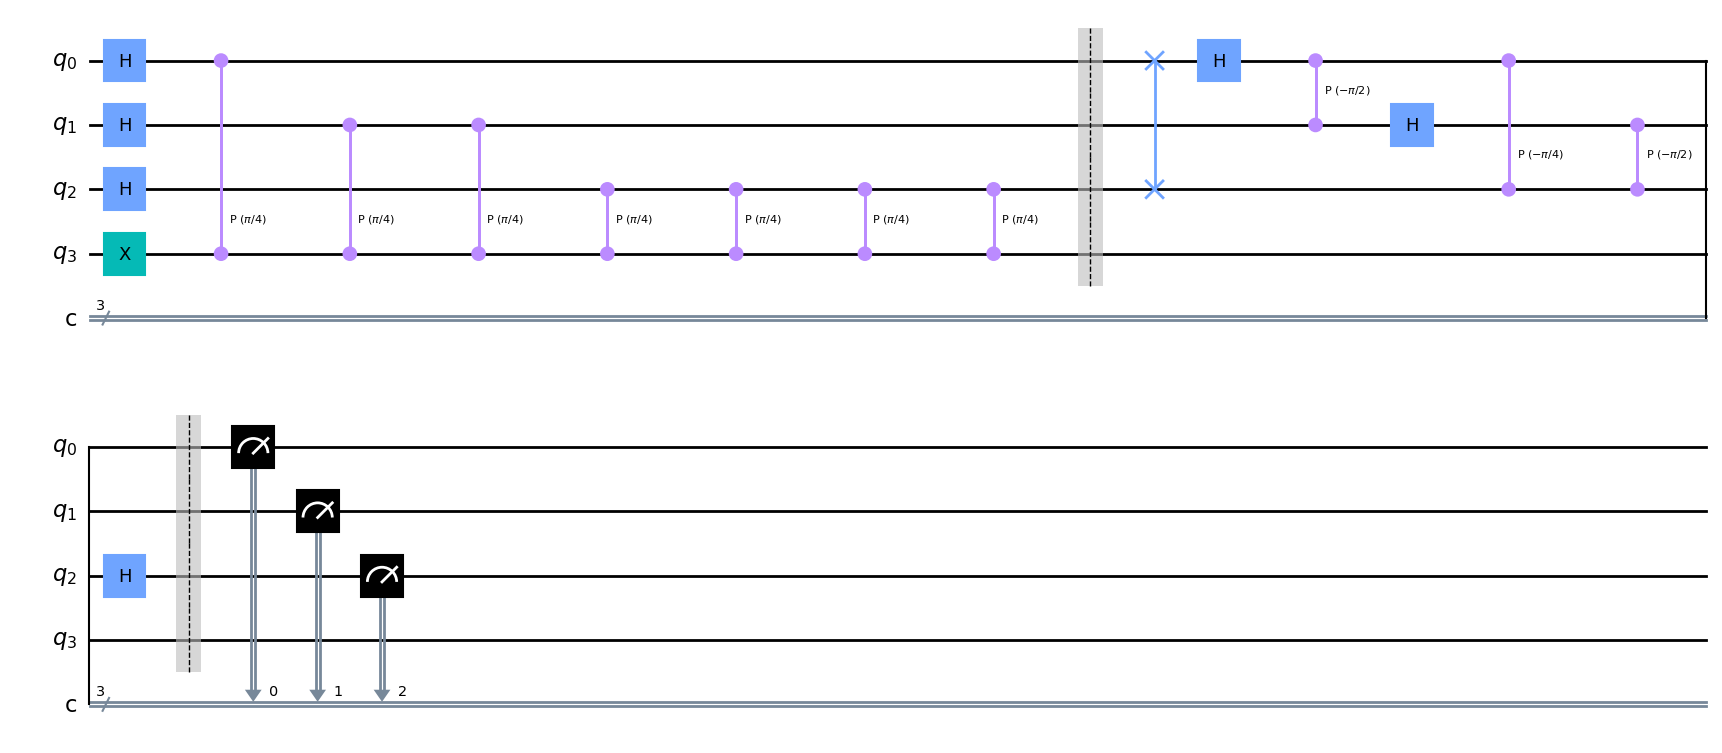

In [4]:
qpe = QuantumCircuit(4, 3)
# Add the eigenvector /1>
qpe.x(3)
# Add the Hadamard gates (H-Gates)
for qubit in range(3):
    qpe.h(qubit)
# Add the powers of the controlled T-gate
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(pi/4, counting_qubit, 3) # This is C-U
    repetitions *= 2
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n, n)
qpe.draw('mpl')

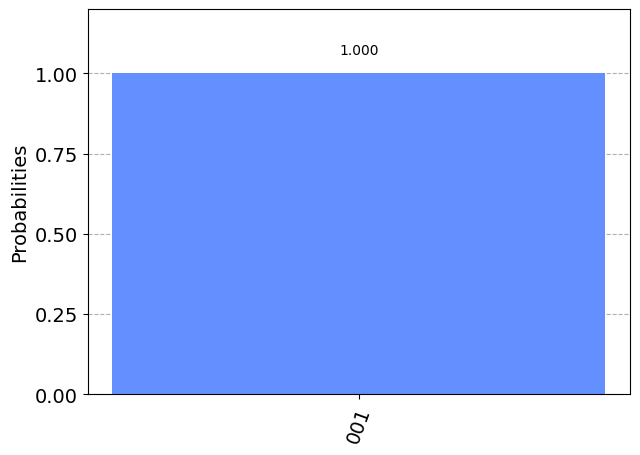

In [5]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

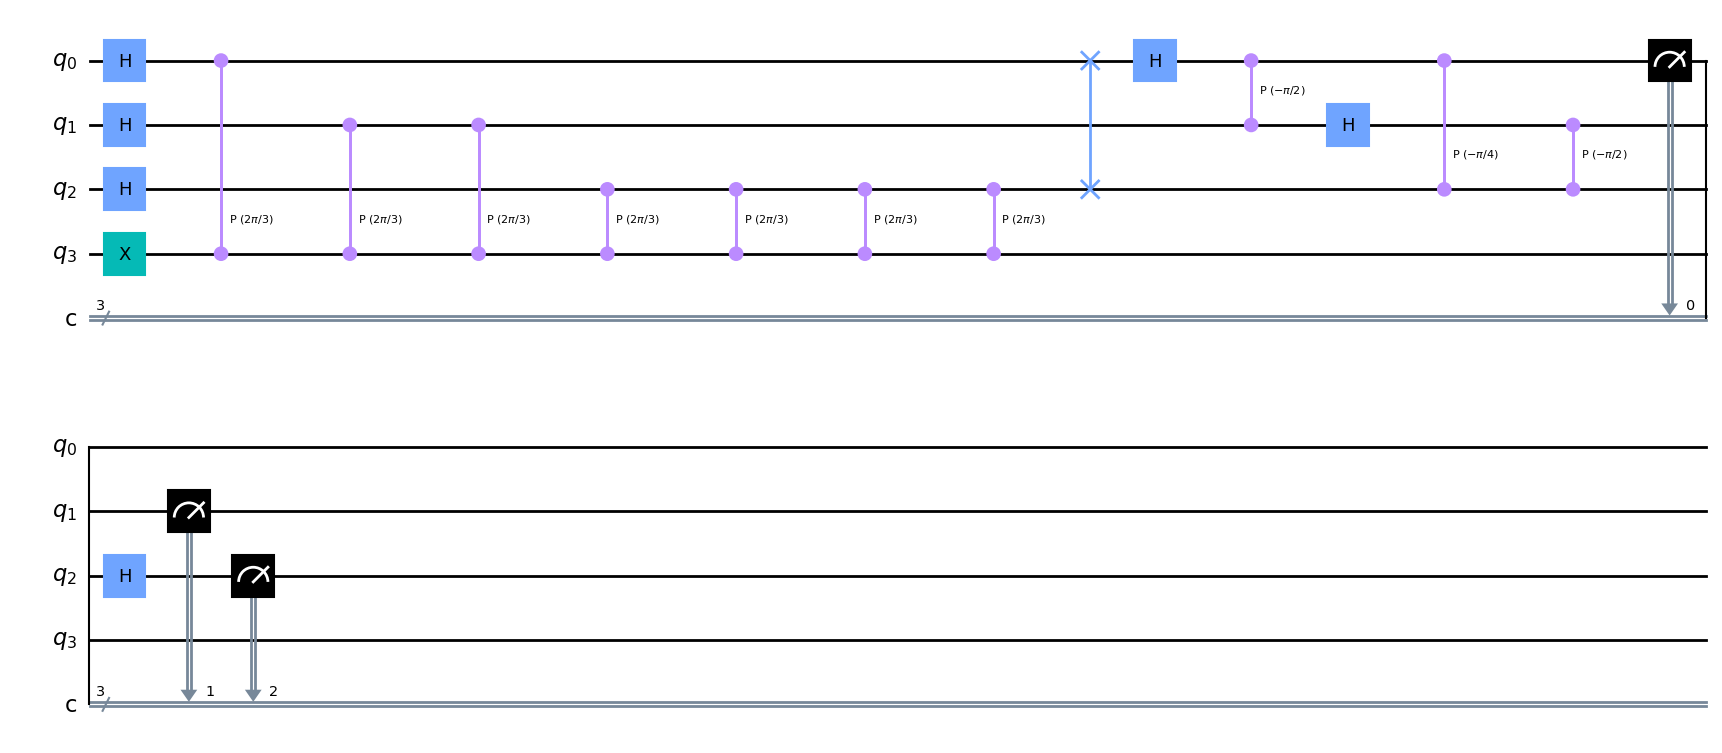

In [6]:
qpe2 = QuantumCircuit(4, 3)
# Add the Hadamard gates (H-Gates)
for qubit in range(3):
    qpe2.h(qubit)
# Prepare our eigenstate /psi>:
qpe2.x(3)
# Do the Controlled-U operations
angle = 2*pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3) # This is C-U
    repetitions *= 2
# Apply inverse QFT
qft_dagger(qpe2, 3)
# Measure
for n in range(3):
    qpe2.measure(n, n)
qpe2.draw('mpl')

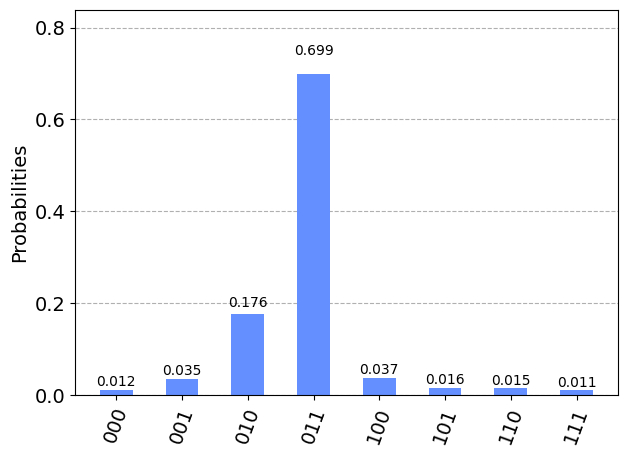

In [7]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe2, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

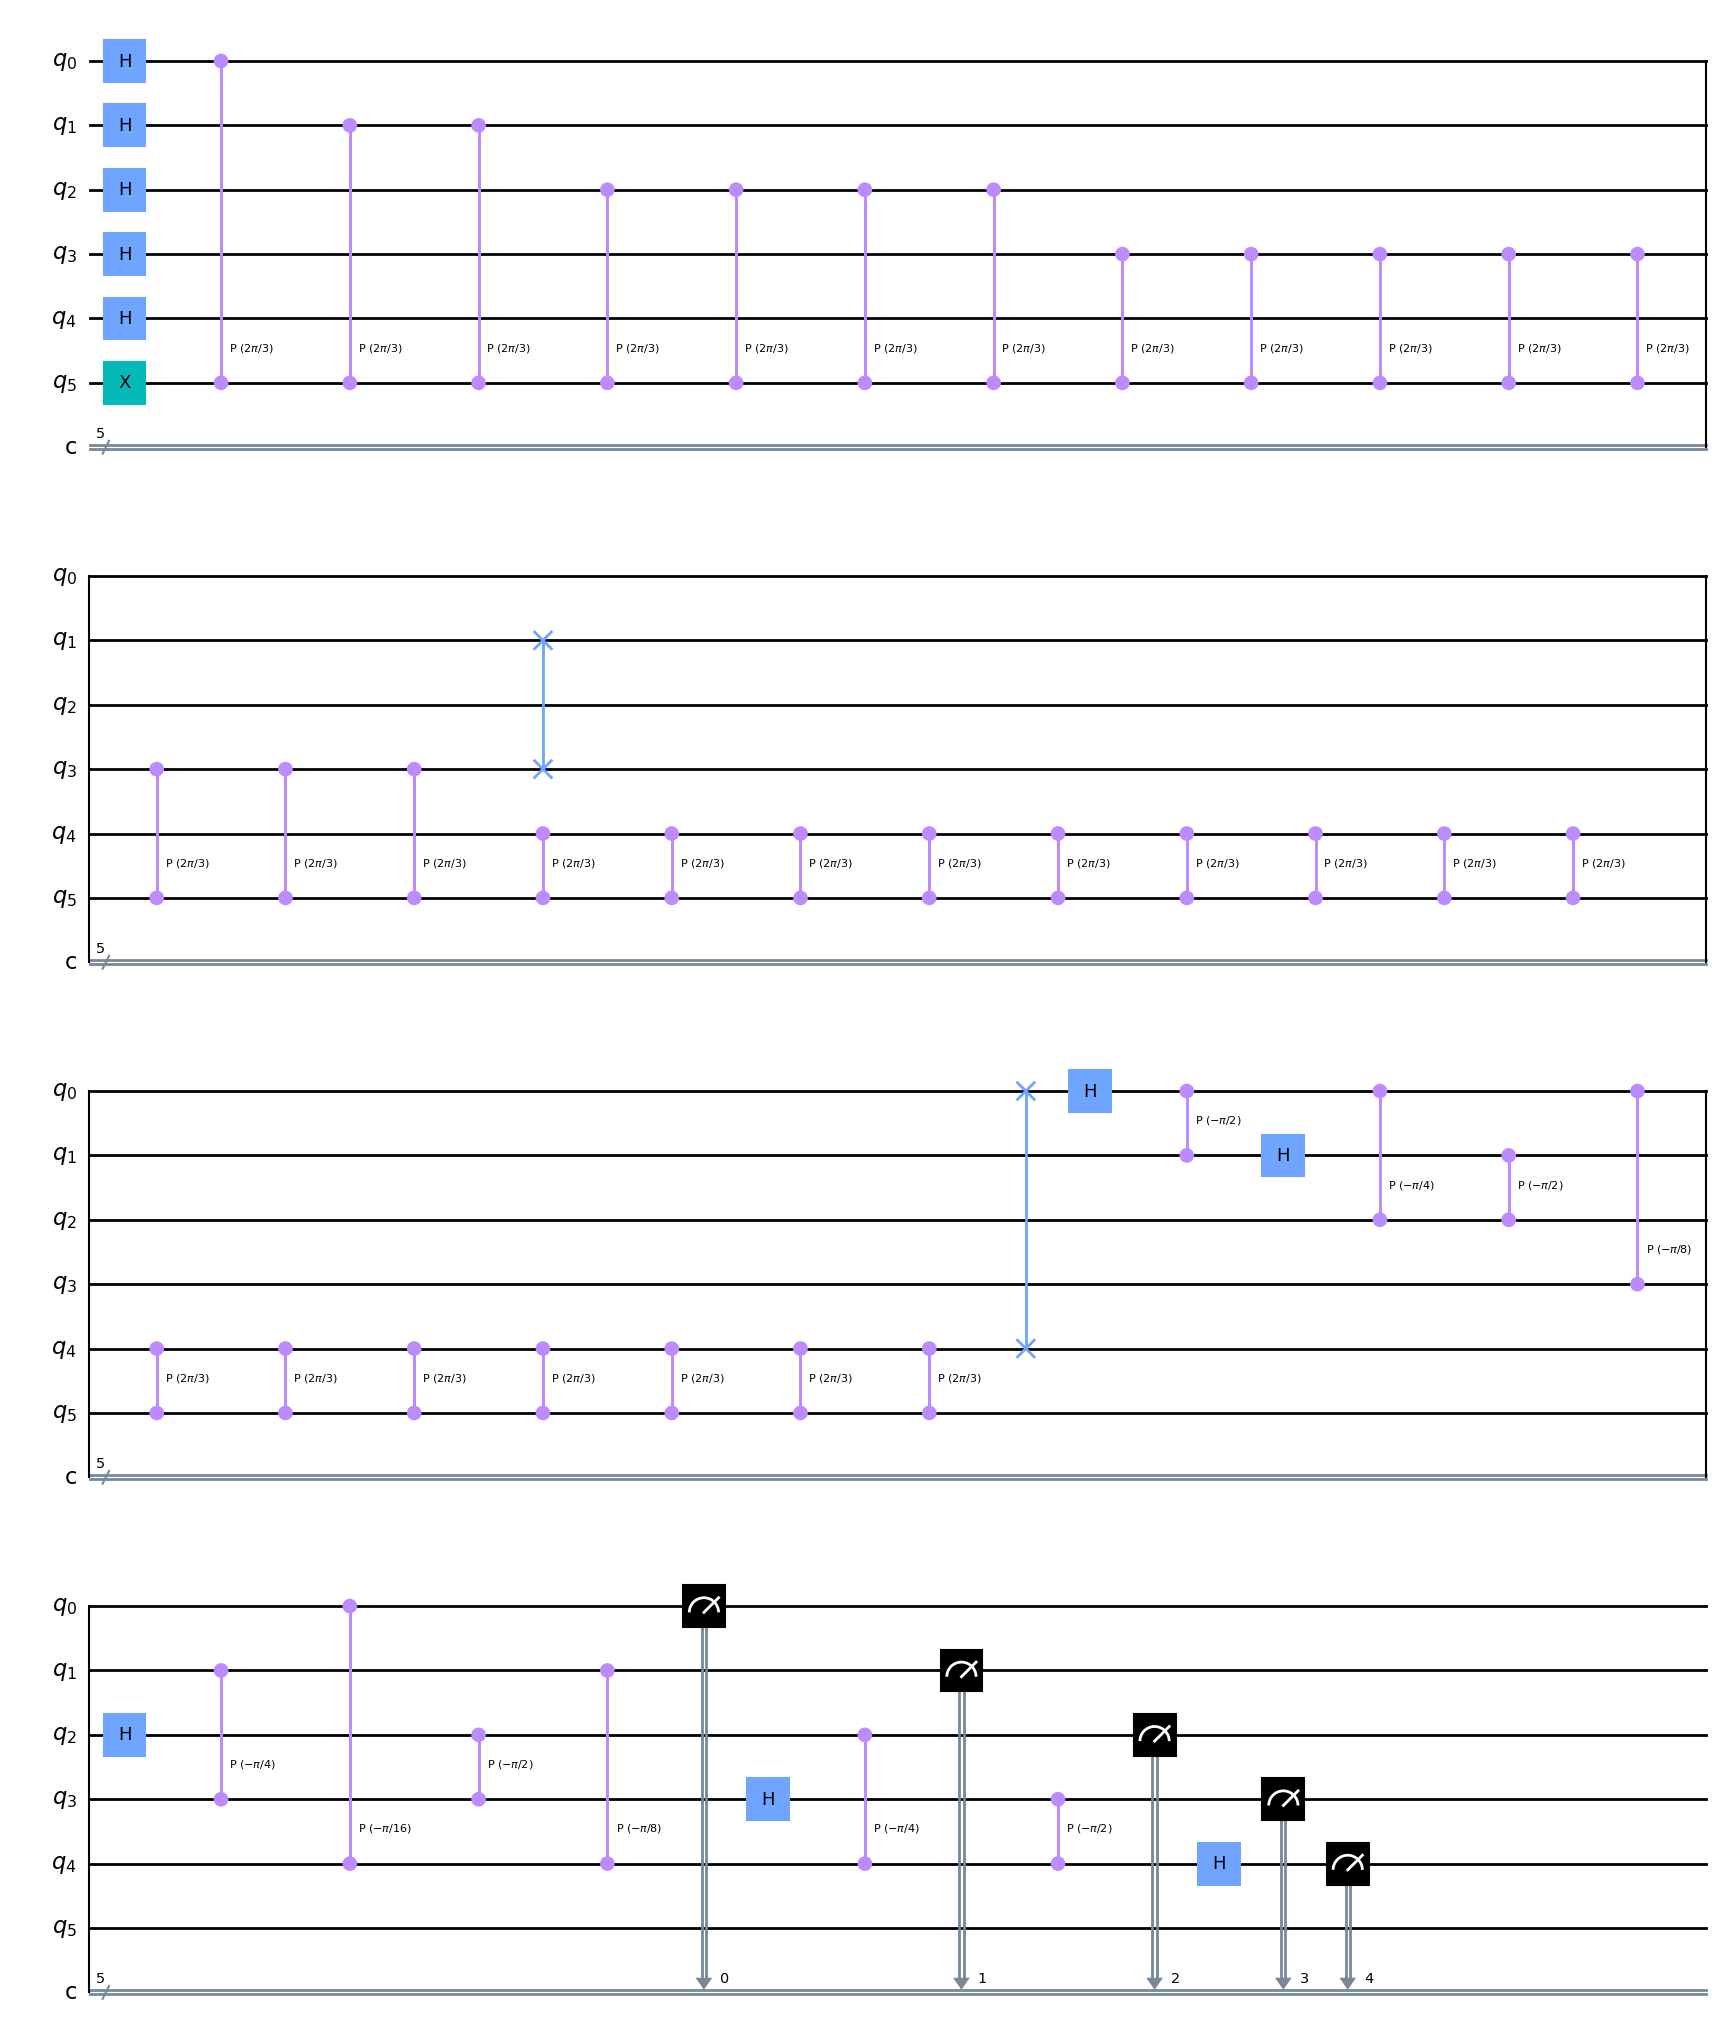

In [8]:
qpe3 = QuantumCircuit(6, 5)
# Add the Hadamard gates (H-Gates)
for qubit in range(5):
    qpe3.h(qubit)
# Prepare our eigenstate /psi>:
qpe3.x(5)
# Do the Controlled-U operations
angle = 2*pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5) # This is C-U
    repetitions *= 2
# Apply inverse QFT
qft_dagger(qpe3, 5)
# Measure
for n in range(5):
    qpe3.measure(n, n)
qpe3.draw('mpl')

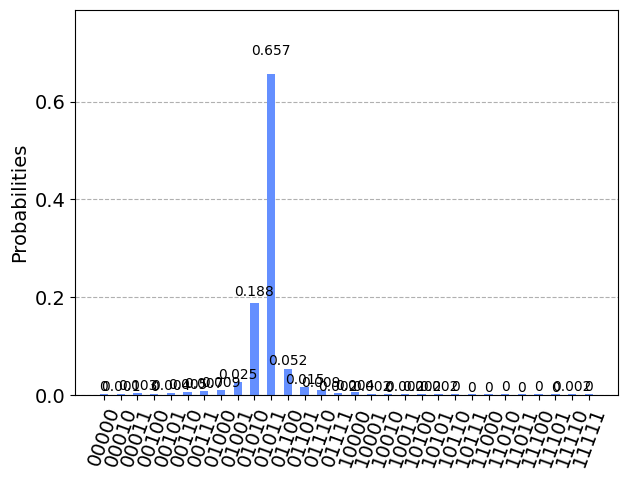

In [9]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe3, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)